Это первое домашнее задание по Компьютерному зрению.
<br>Задачи:
<ul>
<li>Найти лицо на изображении
<li>Отступить на 10% от границ лица и получить этот фрагмент изображения
<li>Получить бинарное изображение границ объекта
<li>Удалить мелкие границы у которых длина и ширина меньше 10
<li>Применить морфологическую операцию наращивания (размер структурирующего элемента 5*5)
<li>Сгладить полученное изображение гауссовским фильтром 5 на 5. Получить нормализованное изображение М, где все пиксели от 0 до 1
<li>Получить изображение F1 лица с применённой билатеральной фильтрацией
<li>Получить изображение F2 лица с улучшенной чёткостью/контрастностью
<li>Осуществить финальную фильтрацию по формуле:
<br>Result[x,y] = M[x,y] * F2[x,y] + (1 - M[x,y]) * F1[x,y]
</ul>

<h1>Изображение над которым будут производиться операции</h1>

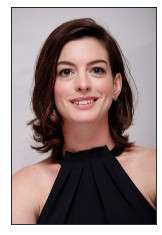

In [1]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    pass

img = Image.open("Ann.jpg")
imshow(img)


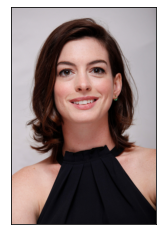

In [2]:
img.thumbnail(size=(500, 500))
imshow(img)

<h1> 1. Ищу лицо на изображении

[[ 75  78 183 183]]


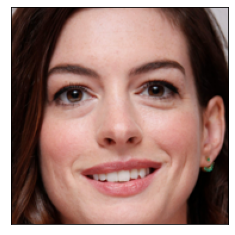

In [3]:
# Для детектирования лиц используем каскады Хаара
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

# Для распознавания используем локальные бинарные шаблоны
recognizer = cv2.face.LBPHFaceRecognizer_create(1,8,8,8,123)

# Переводим изображение в черно-белый формат и приводим его к формату массива
gray = img.convert('L')
img_np = np.array(gray, 'uint8')

# Определяем области где есть лица
faces = faceCascade.detectMultiScale(img_np, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(faces)

crop_img = img.crop((faces[0][0], faces[0][1], faces[0][0] + faces[0][2], faces[0][1] + faces[0][3]))
imshow(crop_img)

<h1>2. Получаю фрагмент с отступом на 10% от границ лица

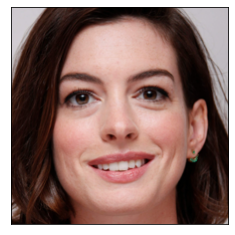

In [4]:
ten_persent_h = faces[0][2] / 10
ten_persent_w = faces[0][3] / 10

img = img.crop((faces[0][0] - ten_persent_h, faces[0][1] - ten_persent_w, faces[0][0] + faces[0][2] + ten_persent_h, faces[0][1] + faces[0][3] + ten_persent_w))

imshow(img)

<h1> 3. Получаю бинарное изображение границ объекта

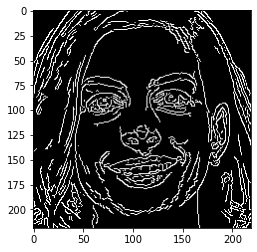

In [5]:
import matplotlib.pyplot as plt

# Переводим изображение в черно-белый формат и приводим его к формату массива
gray = img.convert('L')
img_np = np.array(gray, 'uint8')

canny = cv2.Canny(img_np, 50, 100)

plt.imshow(canny,cmap='gray')
plt.show()

<h1> 4. Удаляю мелкие границы, длина и ширина которых меньше 10

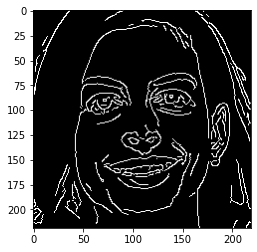

In [6]:
blr_img = cv2.GaussianBlur(img_np, (5, 5), 0)
blr_contours = cv2.Canny(blr_img, 50, 100)

plt.imshow(blr_contours,cmap='gray')
plt.show()

<h1> 5. Применяю морфологическую операцию наращивания

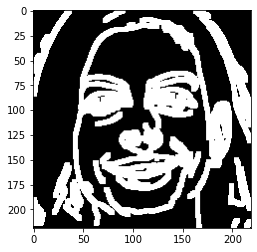

In [7]:
kernel = np.ones((5,5), "uint8")

blr_contours = cv2.dilate(blr_contours, kernel, iterations=1)

plt.imshow(blr_contours,cmap='gray')
plt.show()

<h1> 6. Сглаживаю изображение гаусcовским фильтром.

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.68627451 0.68627451 0.68627451 ... 0.99607843 0.98431373 0.97647059]
 [0.31372549 0.31372549 0.31372549 ... 0.98431373 0.9372549  0.90588235]
 [0.1254902  0.1254902  0.1254902  ... 0.97647059 0.90588235 0.85882353]]


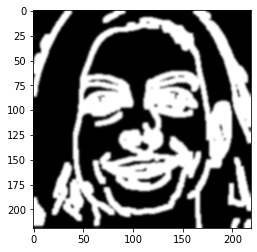

In [8]:
M = cv2.GaussianBlur(blr_contours, (5,5), 0)

M = np.array(M, "float")

# нормализуем матрицу для дальнейших операции
for pixs in range(len(M)):
    for pix in range(len(M[pixs])):
        if (M[pixs][pix] != 0):
            M[pixs][pix] = float(M[pixs][pix] / 255)
print(M)

plt.imshow(M,cmap='gray')
plt.show()

<h1> 7. Применяю билатеральную фильтрацию.

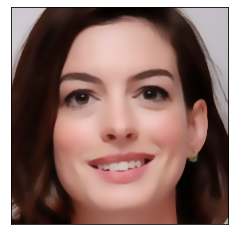

In [9]:
img_np = np.array(img, 'uint8')

F1 = cv2.bilateralFilter(img_np, 10, 75, 75)

imshow(F1)

<h1> 8. Получаю изображение с улучшенной чёткостью/контрастностью.

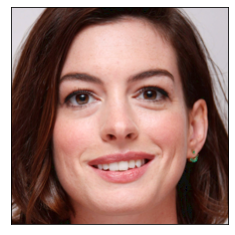

In [10]:

#img_yuv = cv2.cvtColor(img_np, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
#img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
# convert the YUV image back to RGB format
#F2 = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
#imshow(F2)

value = 15

hsv = cv2.cvtColor(img_np, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

lim = 255 - value
v[v > lim] = 255
v[v <= lim] += value

final_hsv = cv2.merge((h, s, v))
F2 = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
imshow(F2)


<h1> 9. Финальная фильтрация.

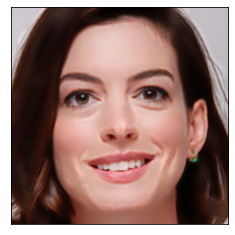

In [11]:
#for i in range(len(img_np)):
 #   for j in range(len(i)):
  #      for k in range(len(j)):
#M1 = cv2.cvtColor(M, cv2.COLOR_GRAY2BGR) 

result = list(F1)

for i in range(len(F1)):
  for j in range(len(F1[i])):
    for k in range(3):
      result[i][j][k] = M[i][j] * F2[i][j][k] + (1 - M[i][j]) * F1[i][j][k]

imshow(result)